<a href="https://colab.research.google.com/github/elkdeer23/phys152-2026/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 1: Decision Tree Classifier (30 points)

In this exercise we will train a decision tree classifier for neutrino experiment data from [the MiniBOONE experiment](https://www.fnal.gov/pub/science/experiments/intensity/miniboone.html).

The goal is to prepare a binary classification to distinguish electron neutrinos (signal) from muon neutrinos (background). The dataset is taken from the UCI ML dataset repository.

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

data = fetch_openml("miniboone", parser="auto", version=1)
X, y = data["data"].values, (data["target"].values == "True").astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

## part 1(a): Data Exploration and Visualization (10 points)

Explore the dataset before building your ML classifier:
- How many events are in the training data and testing data?
- How many input features are there for each point in the training data?
- Plot at least three of the input features for events with `y_train==0` and for events with `y_train==1`.

Number of training events: 104051
Number of testing events: 26013
Number of input features per event: 50


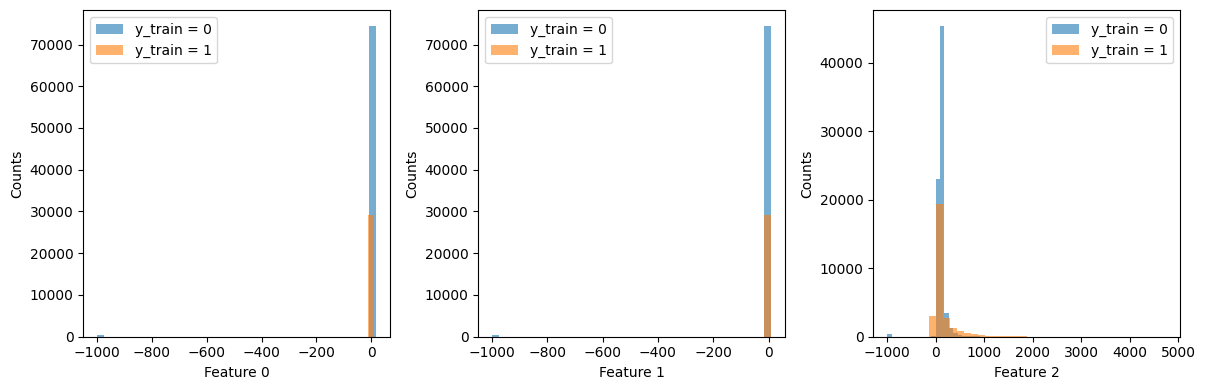

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# number of events in training and testing data
print("Number of training events:", X_train.shape[0])
print("Number of testing events:", X_test.shape[0])

# number of input features per event
print("Number of input features per event:", X_train.shape[1])

# plot at least three input features

# Choose three feature indices
feature_indices = [0, 1, 2]

# Split training data by class
X_train_0 = X_train[y_train == 0]
X_train_1 = X_train[y_train == 1]

plt.figure(figsize=(12, 4))

for i, feature in enumerate(feature_indices):
    plt.subplot(1, 3, i + 1)
    plt.hist(X_train_0[:, feature], bins=40, alpha=0.6, label="y_train = 0")
    plt.hist(X_train_1[:, feature], bins=40, alpha=0.6, label="y_train = 1")
    plt.xlabel(f"Feature {feature}")
    plt.ylabel("Counts")
    plt.legend()

plt.tight_layout()
plt.show()

## part 1(b): Decision Tree (10 points)

Train a simple `DecisionTreeClassifier` with `max_depth=5` and the `gini` criterion to separate the electron neutrino signal and muon neutrino background.

Calculate the performance of the Decision Tree:
- confusion matrix
- ROC curve
- Area Under Curve (AUC)


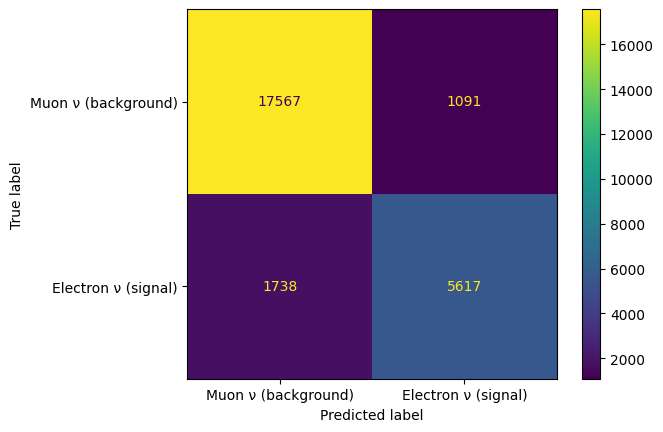

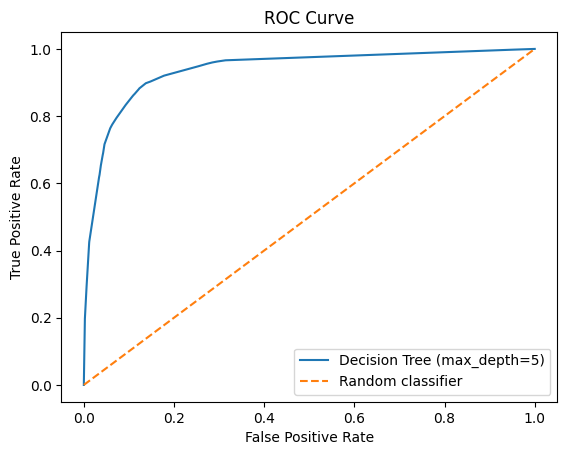

AUC: 0.9380973010266955


In [ ]:
# import centeral
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# training wheels
dt = DecisionTreeClassifier(max_depth=5, criterion="gini", random_state=42)
dt.fit(X_train, y_train)


# i'm confused and so is this matrix
# predict class labels
y_pred = dt.predict(X_test)

# compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Muon ν (background)", "Electron ν (signal)"])
disp.plot()
plt.show()


# ROC curve
# Predict probabilities for the positive class
y_score = dt.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score)

#plots, plots, and more plots
plt.figure()
plt.plot(fpr, tpr, label="Decision Tree (max_depth=5)")
plt.plot([0, 1], [0, 1], linestyle="--", label="Random classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# area under the curve
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)

decison tree -- separate electron neutrino signal from muon neutrino background

depth of five-- it limits overfitting, aka, learning data too closely, aka, computer takes in too much background noise. just being at a value of five lets the 'puter just take in the patterns rather than anything else

confusion matrix-- it shows classification performance at the default threshold

ROC curve,-- performance across ALL thresholds

and finally, AUC is able to summarize model's discrimminating power, random = 0.5, perfect = 1.

since our AUC is 0.93, we got a pretty good machine learning model on our hands

## part 1(c): Gini impurity measure

Visualize the decision tree, and pick three of the leaf nodes in your decision tree visualization.

For each node, calculate the Gini impurity by hand to check against the calculation from scikit-learn. Show the steps of your calculation and the result.

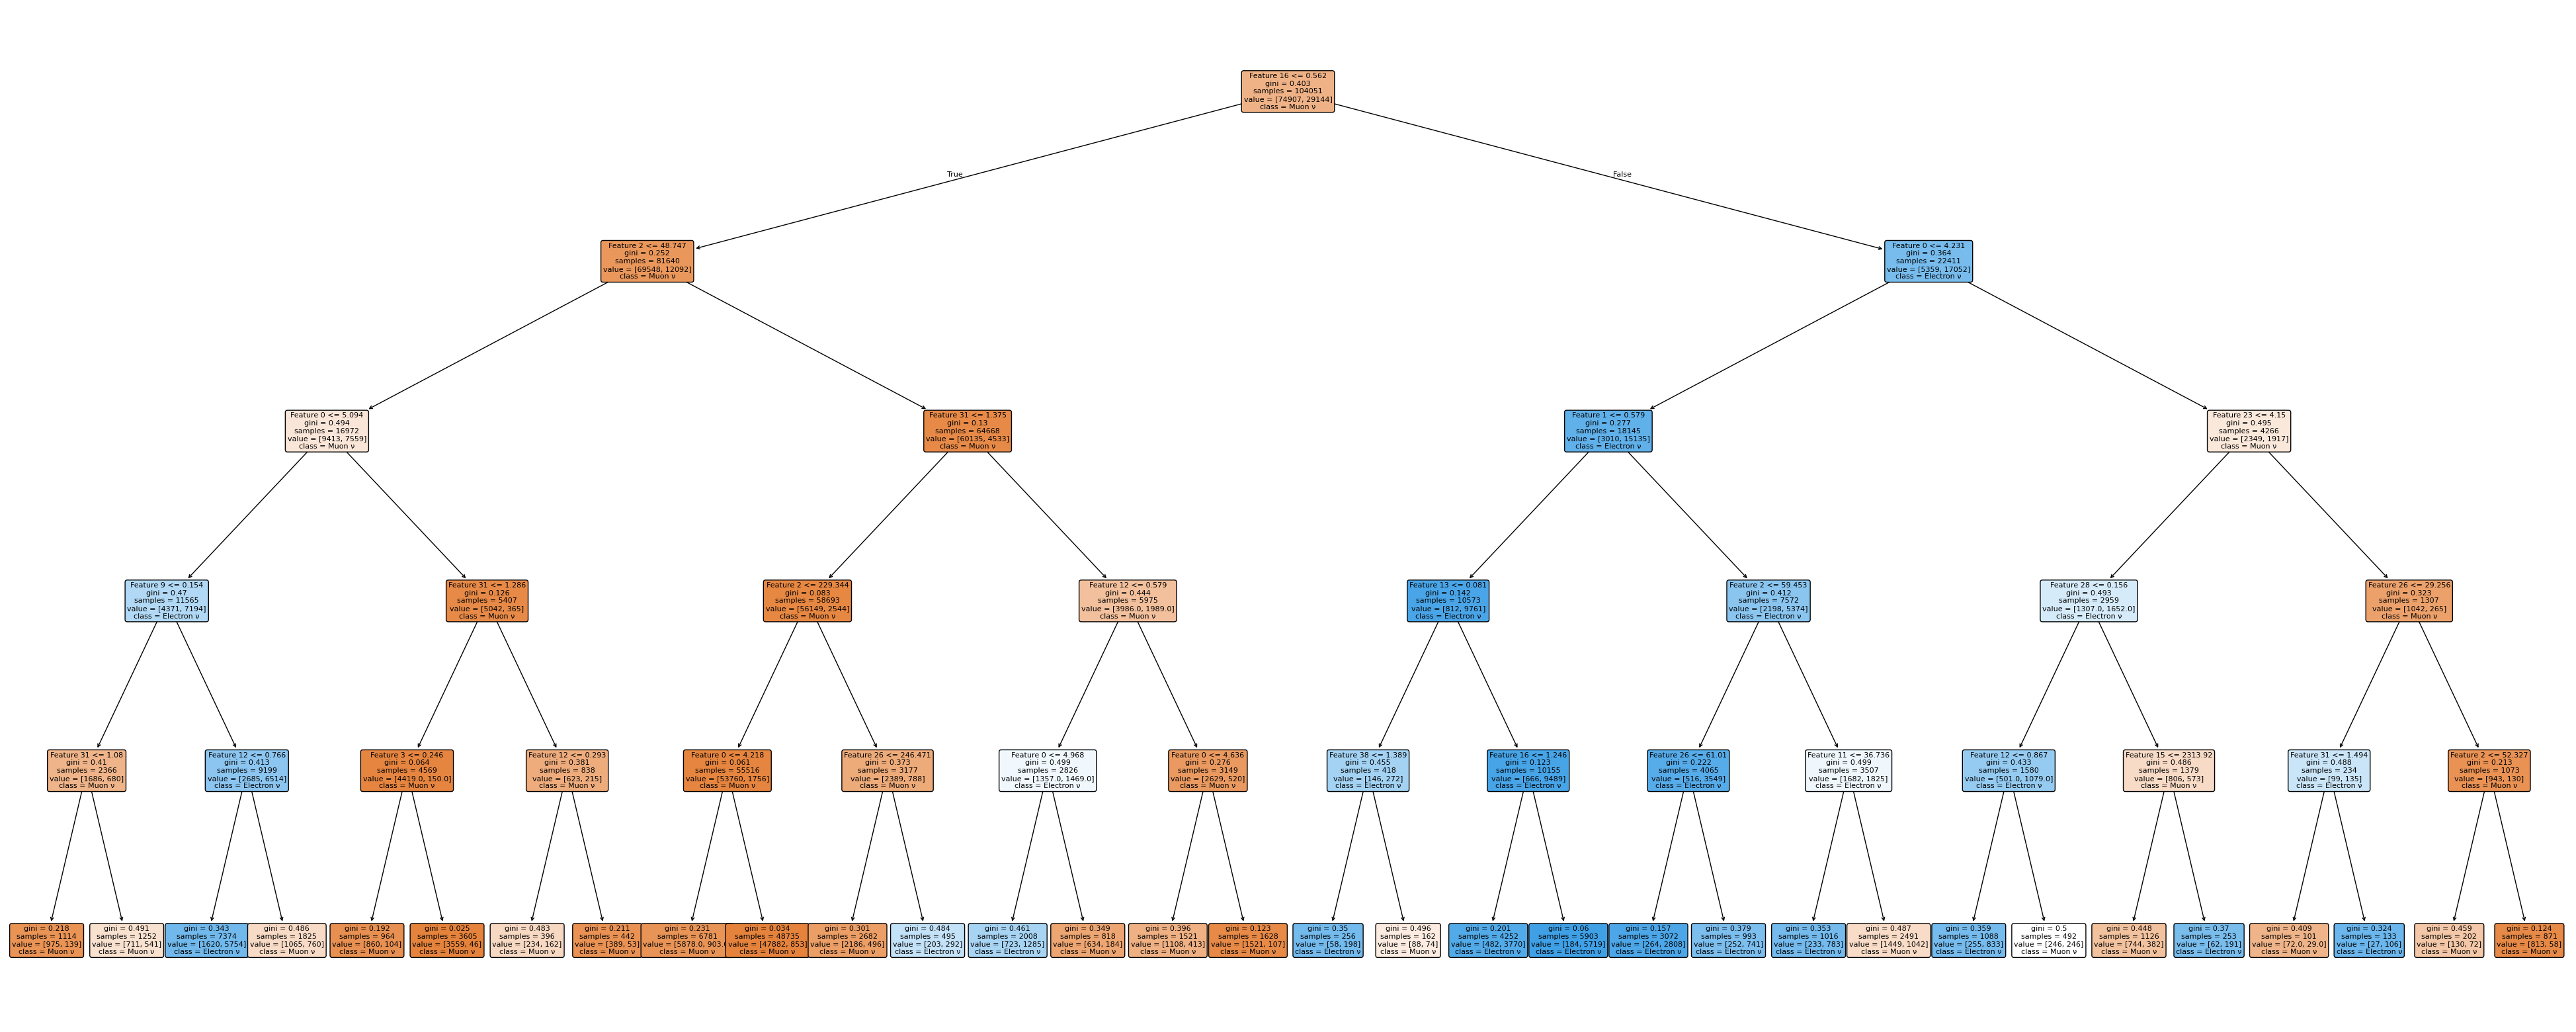

Leaf Node 1
  Node index: 5
  Samples (N): 1114
  Value [N_0, N_1]: [0.87522442 0.12477558]
  Gini impurity (sklearn): 0.21841327449887027
----------------------------------------
Leaf Node 2
  Node index: 6
  Samples (N): 1252
  Value [N_0, N_1]: [0.56789137 0.43210863]
  Gini impurity (sklearn): 0.4907815227265768
----------------------------------------
Leaf Node 3
  Node index: 8
  Samples (N): 7374
  Value [N_0, N_1]: [0.21969081 0.78030919]
  Gini impurity (sklearn): 0.34285351099447114
----------------------------------------


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# visualize the tree, be the tree
plt.figure(figsize=(50, 20))
plot_tree(
    dt,
    filled=True,
    feature_names=[f"Feature {i}" for i in range(X_train.shape[1])],
    class_names=["Muon ν", "Electron ν"],
    rounded=True,
    fontsize=8
)
plt.show()


#pick the leafs off of the tree
tree = dt.tree_

selected_nodes = [5, 6, 8]

for i, node_id in enumerate(selected_nodes):
    value = tree.value[node_id][0]     # [N_0, N_1]
    n_samples = tree.n_node_samples[node_id]
    gini = tree.impurity[node_id]

    print(f"Leaf Node {i+1}")
    print(f"  Node index: {node_id}")
    print(f"  Samples (N): {n_samples}")
    print(f"  Value [N_0, N_1]: {value}")
    print(f"  Gini impurity (sklearn): {gini}")
    print("-" * 40)


For a binary classification problem, the Gini impurity is defined as
$G = 1 - \left(p_0^2 + p_1^2\right),$
where

$p_0 = \frac{N_0}{N}, \quad p_1 = \frac{N_1}{N}, \quad N = N_0 + N_1.
$
Here, $N_0$ and $N_1$ represent the number of background (muon neutrino) and signal (electron neutrino) events in the node, respectively.


leaf node 1:

From the decision tree visualization:
$
N_0 = 975, \quad N_1 = 139, \quad N = 1114.
$

The class probabilities are
$
p_0 = \frac{975}{1114} \approx 0.875, \quad
p_1 = \frac{139}{1114} \approx 0.125.
$

The Gini impurity is
$
G = 1 - (0.875^2 + 0.125^2)
  = 1 - (0.7656 + 0.0156)
  = 1 - 0.7812
  \approx 0.218.
$

this checks out

leaf node 2:

From the decision tree visualization:
$
N_0 = 711, \quad N_1 = 541, \quad N = 1252.
$

The class probabilities are
$
p_0 = \frac{711}{1252} \approx 0.568, \quad
p_1 = \frac{541}{1252} \approx 0.432.
$

The Gini impurity is therefore
$
G = 1 - (0.568^2 + 0.432^2)
  = 1 - (0.322 + 0.187)
  = 1 - 0.509
  \approx 0.491.
$

this also checks out.


finally, leaf node three:

From the decision tree visualization:
$
N_0 = 1620, \quad N_1 = 5754, \quad N = 7374.
$

The class probabilities are
$
p_0 = \frac{1620}{7374} \approx 0.220, \quad
p_1 = \frac{5754}{7374} \approx 0.780.
$

The Gini impurity is
$
G = 1 - (0.220^2 + 0.780^2)
  = 1 - (0.0484 + 0.6084)
  = 1 - 0.6568
  \approx 0.343.
$

all of this checks out with the values reported from scikit-learn. hooray!



# Exercise 2: Backpropagation (30 points)

In this exercise you will gain some experience with the backpropagation equations and the numerical calculations of the gradient.



## part 2(a): Backpropagation theory (15 points)

Complete the proofs of [Nielsen's equations BP3 and BP4](http://neuralnetworksanddeeplearning.com/chap2.html#proof_of_the_four_fundamental_equations_(optional)).

In Nielsen's notation (but with layer numbers written in parenthesis for clarity):
$$
\begin{align}
\frac{\partial C}{\partial b_j^{(l)}} &= \delta_j^{(l)} & \quad \quad \text{(BP3)} \\
\frac{\partial C}{\partial w_{jk}^{(l)}} &= a_k^{(l-1)} \delta_j^{(l)} & \quad \quad \text{(BP4)}
\end{align}
$$
where $C$ is the cost function (loss function), $w$ and $b$ are weights and biases, $a$ is the post-activation output for the layer, and $\delta$ is the error of a single neuron.

derivation of BP3:

we wanna to compute the partial derivative of the cost function with respect to the bias $b_j^l$.

by the chain rule,
$
\frac{\partial C}{\partial b_j^l}
= \frac{\partial C}{\partial z_j^l}
\frac{\partial z_j^l}{\partial b_j^l}.
$

and if we recalling the definition of the weighted input,
$
z_j^l = \sum_k w_{jk}^l a_k^{l-1} + b_j^l,
$

we see that
$
\frac{\partial z_j^l}{\partial b_j^l} = 1.
$

therefore,
$
\frac{\partial C}{\partial b_j^l}
= \frac{\partial C}{\partial z_j^l}
= \delta_j^l.
$

thus we have BP3.

and now we move on.

Derivation of BP4:

with respect to the weight $w_{jk}^l$.

applying the chain rule, we have
$
\frac{\partial C}{\partial w_{jk}^l}
= \frac{\partial C}{\partial z_j^l}
\frac{\partial z_j^l}{\partial w_{jk}^l}.
$

from the definition of $z_j^l$,
$
z_j^l = \sum_m w_{jm}^l a_m^{l-1} + b_j^l,
$

only the term with $m = k$ depends on $w_{jk}^l$, so
$
\frac{\partial z_j^l}{\partial w_{jk}^l} = a_k^{l-1}.
$

substituting back, we obtain
$
\frac{\partial C}{\partial w_{jk}^l}
= \frac{\partial C}{\partial z_j^l} a_k^{l-1}
= \delta_j^l a_k^{l-1}.
$

and there we have it!

## part 2(b): Numerical calculation (15 points)

Consider a single perceptron node with 1-dimensional input $x$. The weight and bias of the node are $w=0.5$ and $b=0.1$. We use the ReLU activation function on the output of the node and the mean square error loss function.

If the data input and target are $x=1, y=1$:
- What is the loss function value?
- What is the gradient $\partial L/\partial w$?
- What is the gradient $\partial L/\partial b$?

You can do this by hand. Show your work, and feel free to check your answer with some code.





first: loss function value
the weighted input to the perceptron is
$
z = wx + b = (0.5)(1) + 0.1 = 0.6.
$

since $z > 0$, the ReLU activation gives
$
\hat{y} = \mathrm{ReLU}(z) = 0.6.
$



using the mean squared error loss,
$
L = \frac{1}{2}(\hat{y} - y)^2,
$

we get
$
L = \frac{1}{2}(0.6 - 1)^2 = \frac{1}{2}(0.16) = 0.08.
$


second: the gradient $\frac{\partial L}{\partial w}$

because $z > 0$, the derivative of the ReLU function is
$
\mathrm{ReLU}'(z) = 1.
$



Applying the chain rule,
$
\frac{\partial L}{\partial w}
= (\hat{y} - y)\mathrm{ReLU}'(z)x.
$

Substituting values,
$
\frac{\partial L}{\partial w} = (0.6 - 1)(1)(1) = -0.4.
$



third: the gradient $\frac{\partial L}{\partial b}$

similarly to the first gradient,

$
\frac{\partial L}{\partial b}
= (\hat{y} - y)\mathrm{ReLU}'(z).
$

then,
$
\frac{\partial L}{\partial b} = (0.6 - 1)(1) = -0.4.
$

# Exercise 3: Deep Neural Networks (40 points)

In this exercise we will train a deep neural network for neutrino experiment data from [the MiniBOONE experiment](https://www.fnal.gov/pub/science/experiments/intensity/miniboone.html).

The goal is similar to Exercise 1 above: prepare a binary classification to distinguish electron neutrinos (signal) from muon neutrinos (background).

In this exercise, you will set up a neural network model using PyTorch and train it using the MiniBOONE training data, then test it on the testing data.

## part 3(a) (20 points): DNN with tanh activation

Implement a deep neural network (at least 1 hidden layer between the input and output layers) to classify events as electron neutrinos (signal) or muon neutrinos (background). Use the tanh activation function, except in the output layer.

Here are some starting points for the DNN:
- 3 hidden layers w/ 64 units each
- BCE loss function
- SGD optimizer w/ batch size of 128

You should expect to train for at least 50 epochs.

In [ ]:
#import centeral
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#data fetching
data = fetch_openml("miniboone", parser="auto", version=1)

X, y = data["data"].values, (data["target"].values == "True").astype(float)

#checking data loads correctly
print("Overall signal fraction:", y.mean())

#training the data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#making sure data is trained correctly
print("Train signal fraction:", y_train.mean())
print("Test signal fraction:", y_test.mean())

#feature standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#convert to PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

#data loaders
batch_size = 128

train_loader = DataLoader(
    TensorDataset(X_train, y_train),
    batch_size=batch_size,
    shuffle=True
)

test_loader = DataLoader(
    TensorDataset(X_test, y_test),
    batch_size=batch_size,
    shuffle=False
)

#define DNN
class DNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 1)  # logits only
        )

    def forward(self, x):
        return self.net(x)

#model loss optimizer

model = DNN(X_train.shape[1])

# Handle class imbalance properly
pos_weight = ((y_train == 0).sum() / (y_train == 1).sum()).detach()


criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.SGD(model.parameters(), lr=0.05)

# training loop
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    print(f"Epoch {epoch+1:02d} | Loss = {avg_loss:.4f}")

Overall signal fraction: 0.28062338541025955
Train signal fraction: 0.28062200267176673
Test signal fraction: 0.2806289163110752
Epoch 01 | Loss = 0.5977
Epoch 02 | Loss = 0.4769
Epoch 03 | Loss = 0.4323
Epoch 04 | Loss = 0.4109
Epoch 05 | Loss = 0.3963
Epoch 06 | Loss = 0.3854
Epoch 07 | Loss = 0.3783
Epoch 08 | Loss = 0.3726
Epoch 09 | Loss = 0.3664
Epoch 10 | Loss = 0.3618
Epoch 11 | Loss = 0.3567
Epoch 12 | Loss = 0.3514


KeyboardInterrupt: 

## part 3(b) (10 points): DNN performance assessment

Calculate the performance of the DNN on the testing data:
- confusion matrix
- ROC curve
- Area Under Curve (AUC)



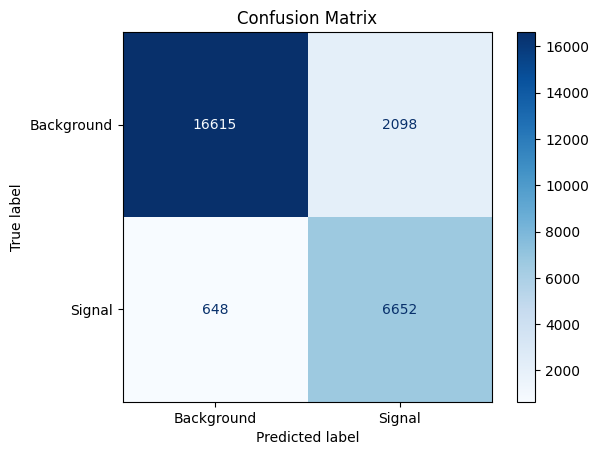

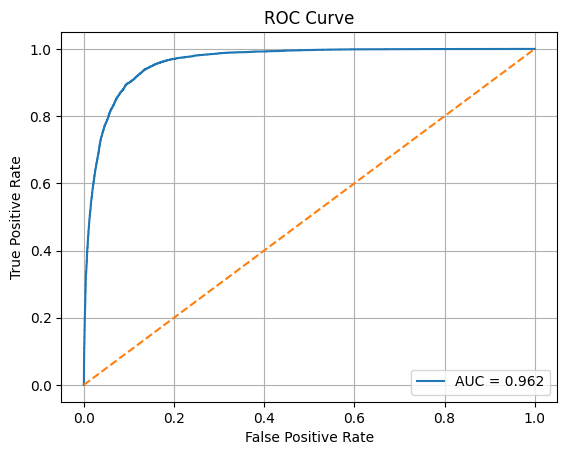

Area Under Curve (AUC): 0.9623


In [ ]:
# import centeral
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

#model predictions
model.eval()

y_true = []
y_scores = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        probs = torch.sigmoid(outputs)

        y_true.extend(labels.squeeze().cpu().numpy())
        y_scores.extend(probs.squeeze().cpu().numpy())

y_true = np.array(y_true)
y_scores = np.array(y_scores)

# im confused and so is this matrix
y_pred = (y_scores >= 0.5).astype(int)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Background", "Signal"]
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

#ROC curve and AUC


fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

print(f"Area Under Curve (AUC): {roc_auc:.4f}")

## part 3(c) (10 points): Change of activation function

Replace the sigmoid activation functions with the ReLU activation functions, in the layers where it is possible.
(Hint: there is one layer where you can't use the ReLU activation function--why not?)

What happens with the training and performance? Can you improve the performance relative to the original training with sigmoid activation functions?

In [ ]:
#import centeral
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#data fetching
data = fetch_openml("miniboone", parser="auto", version=1)

X, y = data["data"].values, (data["target"].values == "True").astype(float)

#checking data loads correctly
print("Overall signal fraction:", y.mean())

#training the data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

#making sure data is trained correctly
print("Train signal fraction:", y_train.mean())
print("Test signal fraction:", y_test.mean())

#feature standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#convert to PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

#data loaders
batch_size = 128

train_loader = DataLoader(
    TensorDataset(X_train, y_train),
    batch_size=batch_size,
    shuffle=True
)

test_loader = DataLoader(
    TensorDataset(X_test, y_test),
    batch_size=batch_size,
    shuffle=False
)

#define DNN
class DNN(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),          # ReLU instead of Tanh
            nn.Linear(64, 64),
            nn.ReLU(),          # ReLU instead of Tanh
            nn.Linear(64, 64),
            nn.ReLU(),          # ReLU instead of Tanh
            nn.Linear(64, 1)    # NO activation here (logits)
        )

    def forward(self, x):
        return self.net(x)
#model loss optimizer

model = DNN(X_train.shape[1])

# Handle class imbalance properly
pos_weight = ((y_train == 0).sum() / (y_train == 1).sum()).detach()


criterion = nn.BCEWithLogitsLoss(pos_weight=pos_weight)
optimizer = optim.SGD(model.parameters(), lr=0.05)

# training loop
num_epochs = 50

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    avg_loss = epoch_loss / len(train_loader)
    print(f"Epoch {epoch+1:02d} | Loss = {avg_loss:.4f}")

Overall signal fraction: 0.28062338541025955
Train signal fraction: 0.28062200267176673
Test signal fraction: 0.2806289163110752
Epoch 01 | Loss = 0.6048
Epoch 02 | Loss = 0.4114
Epoch 03 | Loss = 0.3851
Epoch 04 | Loss = 0.3722
Epoch 05 | Loss = 0.3623
Epoch 06 | Loss = 0.3549
Epoch 07 | Loss = 0.3479
Epoch 08 | Loss = 0.3434
Epoch 09 | Loss = 0.3406
Epoch 10 | Loss = 0.3345
Epoch 11 | Loss = 0.3312
Epoch 12 | Loss = 0.3286
Epoch 13 | Loss = 0.3251
Epoch 14 | Loss = 0.3229
Epoch 15 | Loss = 0.3209
Epoch 16 | Loss = 0.3178
Epoch 17 | Loss = 0.3163
Epoch 18 | Loss = 0.3133
Epoch 19 | Loss = 0.3121
Epoch 20 | Loss = 0.3106
Epoch 21 | Loss = 0.3069
Epoch 22 | Loss = 0.3063
Epoch 23 | Loss = 0.3046
Epoch 24 | Loss = 0.3030
Epoch 25 | Loss = 0.3017
Epoch 26 | Loss = 0.2996
Epoch 27 | Loss = 0.2993
Epoch 28 | Loss = 0.2981
Epoch 29 | Loss = 0.2948
Epoch 30 | Loss = 0.2934
Epoch 31 | Loss = 0.2929
Epoch 32 | Loss = 0.2915
Epoch 33 | Loss = 0.2918
Epoch 34 | Loss = 0.2900
Epoch 35 | Loss = 0.2

KeyboardInterrupt: 

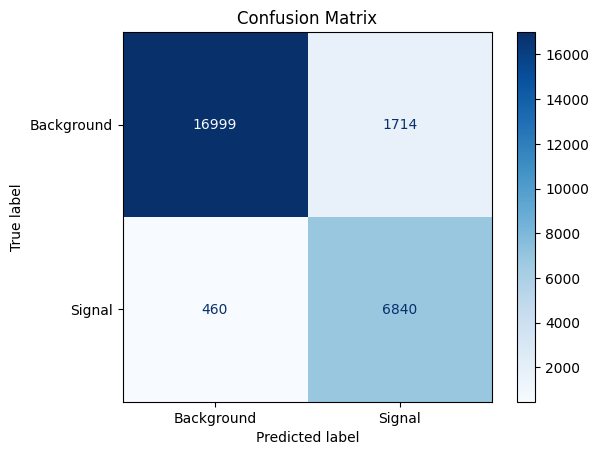

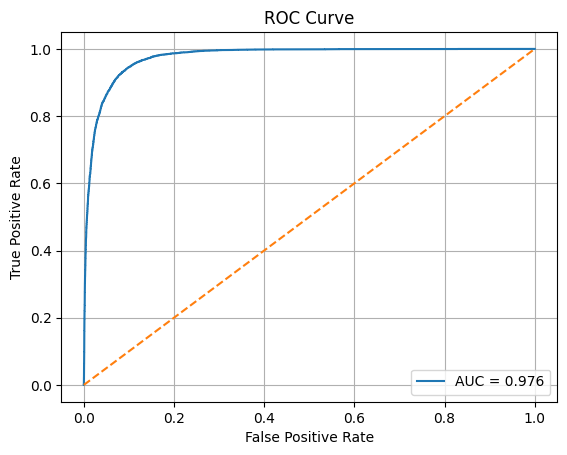

Area Under Curve (AUC): 0.9760


In [ ]:
# import centeral
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

#model predictions
model.eval()

y_true = []
y_scores = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        probs = torch.sigmoid(outputs)

        y_true.extend(labels.squeeze().cpu().numpy())
        y_scores.extend(probs.squeeze().cpu().numpy())

y_true = np.array(y_true)
y_scores = np.array(y_scores)

# im confused and so is this matrix
y_pred = (y_scores >= 0.5).astype(int)

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(
    confusion_matrix=cm,
    display_labels=["Background", "Signal"]
)

disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

#ROC curve and AUC


fpr, tpr, thresholds = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

print(f"Area Under Curve (AUC): {roc_auc:.4f}")

why can't you use ReLU on one layer? -- you can't use ReLU on output layer because the loss function is BCEWithLogitsLoss, which means the output expects raw, unbounded digits, either positive or negative. using the ReLU on the ouput would force all outputs to be positive, breaking the probabilistic interpretation and the loss.

what happens to the training and the performance?-- replacing with ReLU means faster/more stable training, since ReLU gets rid of vanishing gradient effects. overall classification performance is similar/modest improvement.

can you improve the performance relative to the original training with sigmoid activation functions?-- ReLU allows networks to train and converge faster. improvement is there, but only slightly. final product is often limited to the dataset/ network arcitecture.